In [1]:
# curl -k "https://singlecell.broadinstitute.org/single_cell/api/v1/bulk_download/generate_curl_config?accessions=SCP12&auth_code=zFipUH7w&directory=all&context=study"  -o cfg.txt; curl -K cfg.txt && rm cfg.txt

In [ ]:
# # #  Out of the 23686 genes in the expression matrix, we run GENIE3 on the


#genes expressed with more than 202 logged TPM counts (at least 5 logged TPM counts in 1% of the population) and
#detected in more than 40 cells (1% of the total data set), resulting in an expression matrix with 14728 genes and 4043
#cells

In [2]:
import pandas, numpy
import sklearn, sklearn.manifold, sklearn.preprocessing

In [3]:
import matplotlib, matplotlib.pyplot
%matplotlib inline
matplotlib.rcParams.update({'font.size':20, 
                            'font.family':'sans-serif', 
                            'xtick.labelsize':30, 
                            'ytick.labelsize':30, 
                            'figure.figsize':(16, 10), 
                            'axes.labelsize':40})

# 0. user-defined variables

In [4]:
expression_file = '/home/adrian/scratch/SCP12/expression/OG_processed_data_portal.txt'
metadata_file = '/home/adrian/scratch/SCP12/metadata/cell_type_assignment_portal.txt'

# 1. read information

In [5]:
%%time
expression = pandas.read_csv(expression_file, sep='\t', index_col=0)
expression

CPU times: user 8.99 s, sys: 347 ms, total: 9.34 s
Wall time: 9.34 s


,MGH36_P6_A12,MGH36_P6_H09,MGH53_P4_G04,MGH36_P10_G12,MGH53_P2_H12,MGH53_P4_D10,MGH53_P4_D01,MGH36_P6_B07,MGH36_P10_B12,MGH53_P2_G11,...,93_P10_H06,93_P8_B12,93_P8_D09,93_P9_D11,93_P10_G08,93_P8_H06,93_P9_C07,93_P8_A12,93_P8_C01,93_P9_F06
GENE,,,,,,,,,,,,,,,,,,,,,
A1BG,0.00000,0.0000,0.00000,0.00000,0.000000,0.00000,0.0000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.0000,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000
A1BG-AS1,0.00000,0.0000,0.00000,0.00000,0.000000,0.00000,0.0000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.0000,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000
A1CF,0.00000,0.0000,0.00000,0.00000,0.021480,0.00000,0.0000,0.000000,0.527070,0.000000,...,0.00000,0.000000,0.0000,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000
A2M,5.70560,4.4370,8.02760,5.62880,0.000000,3.33670,8.7811,8.327100,7.426200,9.046200,...,0.00000,0.000000,0.0000,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000
A2M-AS1,0.00000,0.0000,4.53470,0.00000,0.000000,0.00000,0.0000,3.336100,0.000000,0.631340,...,0.00000,0.000000,0.0000,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,0.35163,0.0000,0.70752,0.00000,0.221570,0.00000,1.2910,0.932060,0.401630,0.618240,...,0.00000,0.000000,0.0000,0.63227,0.438290,0.00000,0.20163,0.270230,0.00000,0.37740
ZYG11B,0.00000,2.2185,0.84398,1.22590,0.144050,0.67987,4.0467,3.739500,0.000000,0.096262,...,0.29983,0.064883,0.0000,0.18396,0.247320,0.27262,4.06500,0.049631,0.42223,0.47923
ZYX,1.36180,3.2621,0.00000,0.00000,4.980900,0.00000,0.0000,0.000000,0.680770,2.255800,...,3.63040,3.220600,0.0000,0.00000,1.912600,0.00000,0.00000,1.348200,3.45900,3.19980


In [6]:
metadata = pandas.read_csv(metadata_file, sep='\t', index_col=0)
metadata

,CLUSTER,SUB-CLUSTER
NAME,,
TYPE,group,group
MGH36_P6_A12,Microglia/Macrophage,Microglia/Macrophage
MGH36_P6_H09,Microglia/Macrophage,Microglia/Macrophage
MGH53_P4_G04,Microglia/Macrophage,Microglia/Macrophage
MGH36_P10_G12,Microglia/Macrophage,Microglia/Macrophage
...,...,...
93_P8_H06,malignant,malignant
93_P9_C07,malignant,malignant
93_P8_A12,malignant,malignant


# 3. exclude non-malignant cells

In [7]:
print(set(metadata['CLUSTER'].values))
print(set(metadata['SUB-CLUSTER'].values))

{'Microglia/Macrophage', 'malignant', 'Oligodendrocytes (non-malignant)', 'group', '0'}
{'Microglia/Macrophage', 'malignant', 'Oligodendrocytes (non-malignant)', 'group', '0'}


In [8]:
# exclude non-malignant cells
malignant_labels = metadata[metadata['CLUSTER'] == 'malignant'].index
malignant_expression = expression.loc[:, malignant_labels]
malignant_expression.shape

(23686, 4044)

# 4. deal with NaN

In [9]:
# count NaN
percentage = 100*malignant_expression.isnull().sum().sum()/malignant_expression.size
percentage

0.022406154106734223

In [10]:
numpy.sort(malignant_expression.isnull().sum())

array([ 0,  0,  0, ..., 21, 21, 21])

In [11]:
malignant_expression[malignant_expression.isna().any(axis=1)]

NAME,MGH36_P1_A01,MGH36_P1_A02,MGH36_P1_A03,MGH36_P1_A04,MGH36_P1_A05,MGH36_P1_A06,MGH36_P1_A08,MGH36_P1_A10,MGH36_P1_A12,MGH36_P1_B02,...,93_P10_H06,93_P8_B12,93_P8_D09,93_P9_D11,93_P10_G08,93_P8_H06,93_P9_C07,93_P8_A12,93_P8_C01,93_P9_F06
GENE,,,,,,,,,,,,,,,,,,,,,
ELP5,4.78290,0.0000,0.0000,0.00000,0.00000,0.00000,3.6243,4.88240,4.23300,4.20120,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MGC2752,0.19156,1.7476,3.5259,0.36849,0.51702,0.37072,0.0000,0.22157,0.25701,0.45943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MIR124-3,0.00000,0.0000,0.0000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MIR1243,0.00000,0.0000,0.0000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MIR128-1,0.00000,0.0000,0.0000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MIR128-2,0.00000,0.0000,0.0000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MIR1281,0.00000,0.0000,0.0000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MIR1282,0.00000,0.0000,0.0000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MIR129-1,0.00000,0.0000,0.0000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It seems there are 21 genes with NaN values. I vote to exclude them.

In [12]:
print(malignant_expression.shape)
malignant_expression.dropna(axis=0, inplace=True)
print(malignant_expression.shape)

(23686, 4044)
(23665, 4044)


# 5. explore the distribution

In [13]:
all_values = malignant_expression.values.flatten()
substantial_values = all_values[all_values > 1]
print(all_values.size)
print(substantial_values.size)

95701260
14580788


9782


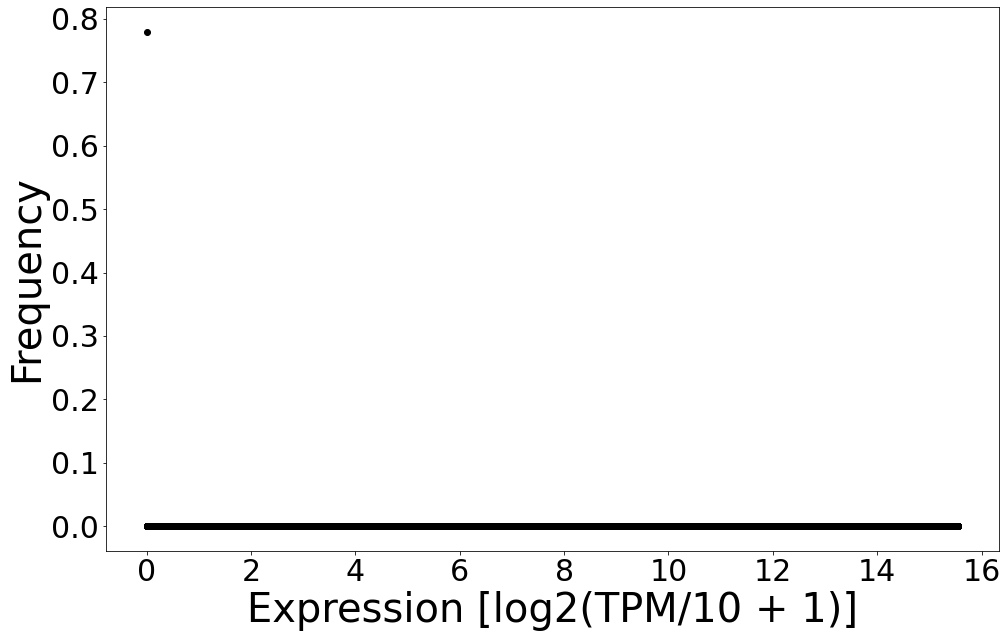

In [14]:
optimal_k = int(numpy.sqrt(all_values.size))
#optimal_k = 10
print(optimal_k)
n, bins = numpy.histogram(all_values, bins=optimal_k)

x = []; y = []
half_bin =(bins[1] - bins[0])/2
for abin in bins:
    center = abin + half_bin
    x.append(center)
x.pop()
y = numpy.array(n)
y = list(y/float(sum(y)))

matplotlib.pyplot.plot(x, y, 'ok')
matplotlib.pyplot.xlabel('Expression [log2(TPM/10 + 1)]')
matplotlib.pyplot.ylabel('Frequency')
matplotlib.pyplot.show()

3818


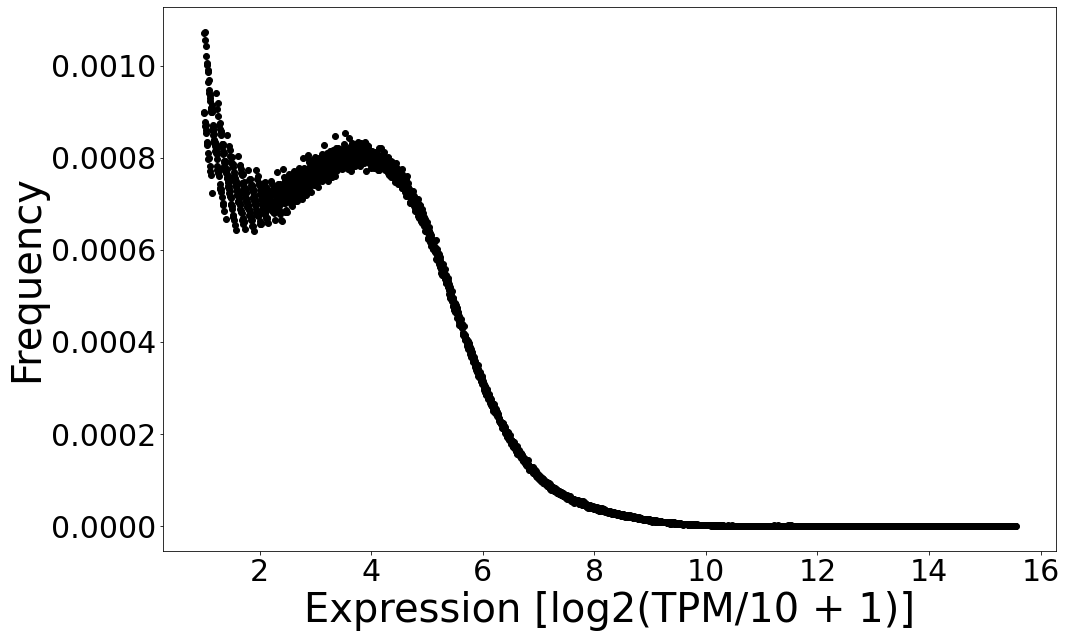

In [15]:
optimal_k = int(numpy.sqrt(substantial_values.size))
#optimal_k = 10
print(optimal_k)
n, bins = numpy.histogram(substantial_values, bins=optimal_k)

x = []; y = []
half_bin =(bins[1] - bins[0])/2
for abin in bins:
    center = abin + half_bin
    x.append(center)
x.pop()
y = numpy.array(n)
y = list(y/float(sum(y)))

matplotlib.pyplot.plot(x, y, 'ok')
matplotlib.pyplot.xlabel('Expression [log2(TPM/10 + 1)]')
matplotlib.pyplot.ylabel('Frequency')
matplotlib.pyplot.show()

# 6. tSNE

In [17]:
transpose_malignant_expression = malignant_expression.transpose()
transpose_malignant_expression.shape

(4044, 23665)

In [20]:
standarized_data = sklearn.preprocessing.StandardScaler().fit_transform(transpose_malignant_expression)

In [34]:
transpose_malignant_expression 

GENE,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A4GALT,A4GNT,AA06,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
NAME,,,,,,,,,,,,,,,,,,,,,
MGH36_P1_A01,0.0,0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.069015,0.00000,3.09190,0.089498,0.113700,1.537500,0.00000,2.57170
MGH36_P1_A02,0.0,0.0,0.00000,0.0,0.0,0.12433,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00000,0.14796,0.214120,0.078610,4.534500,4.05110,0.00000
MGH36_P1_A03,0.0,0.0,0.02432,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00000,0.41576,0.267840,0.168640,3.601200,1.74420,0.00000
MGH36_P1_A04,0.0,0.0,0.02432,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00000,2.01970,0.201630,0.181420,0.097611,0.95010,0.00000
MGH36_P1_A05,0.0,0.0,0.00000,0.0,0.0,0.24732,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00000,0.35952,0.316150,4.526300,0.000000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93_P8_H06,0.0,0.0,0.00000,0.0,0.0,0.21785,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00000,3.81660,0.000000,0.272620,0.000000,0.97893,3.51530
93_P9_C07,0.0,0.0,0.00000,0.0,0.0,0.42223,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00000,0.17632,0.201630,4.065000,0.000000,0.00000,0.00000
93_P8_A12,0.0,0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,2.147000,0.00000,0.14666,0.270230,0.049631,1.348200,1.74110,0.00000


In [33]:
transpose_malignant_expression.sum(axis=0)

GENE
A1BG         415.989290
A1BG-AS1     448.523082
A1CF          54.271926
A2M          267.745760
A2M-AS1      162.415900
               ...     
ZYG11A      1446.370215
ZYG11B      3108.935080
ZYX         5279.864938
ZZEF1       3560.917542
ZZZ3        1839.057534
Length: 23665, dtype: float64

In [39]:
transpose_malignant_expression.loc['TOTAL', :] = transpose_malignant_expression.sum(axis=0)

In [40]:
transpose_malignant_expression

GENE,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A4GALT,A4GNT,AA06,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,spsp,TOTAL
NAME,,,,,,,,,,,,,,,,,,,,,
MGH36_P1_A01,0.00000,0.000000,0.000000,0.00000,0.0000,0.000000,0.00000,0.00000,0.00000,0.0000,...,0.069015,0.000000,3.091900,0.089498,0.113700,1.537500,0.000000,2.571700,NaN,NaN
MGH36_P1_A02,0.00000,0.000000,0.000000,0.00000,0.0000,0.124330,0.00000,0.00000,0.00000,0.0000,...,0.000000,0.000000,0.147960,0.214120,0.078610,4.534500,4.051100,0.000000,NaN,NaN
MGH36_P1_A03,0.00000,0.000000,0.024320,0.00000,0.0000,0.000000,0.00000,0.00000,0.00000,0.0000,...,0.000000,0.000000,0.415760,0.267840,0.168640,3.601200,1.744200,0.000000,NaN,NaN
MGH36_P1_A04,0.00000,0.000000,0.024320,0.00000,0.0000,0.000000,0.00000,0.00000,0.00000,0.0000,...,0.000000,0.000000,2.019700,0.201630,0.181420,0.097611,0.950100,0.000000,NaN,NaN
MGH36_P1_A05,0.00000,0.000000,0.000000,0.00000,0.0000,0.247320,0.00000,0.00000,0.00000,0.0000,...,0.000000,0.000000,0.359520,0.316150,4.526300,0.000000,0.000000,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93_P9_C07,0.00000,0.000000,0.000000,0.00000,0.0000,0.422230,0.00000,0.00000,0.00000,0.0000,...,0.000000,0.000000,0.176320,0.201630,4.065000,0.000000,0.000000,0.000000,NaN,NaN
93_P8_A12,0.00000,0.000000,0.000000,0.00000,0.0000,0.000000,0.00000,0.00000,0.00000,0.0000,...,2.147000,0.000000,0.146660,0.270230,0.049631,1.348200,1.741100,0.000000,NaN,NaN
93_P8_C01,0.00000,0.000000,0.000000,0.00000,0.0000,0.000000,0.00000,0.00000,0.00000,0.0000,...,0.000000,0.000000,0.725090,0.000000,0.422230,3.459000,1.290400,0.000000,NaN,NaN


In [18]:
all_labels = [element.split('_')[0] for element in transpose_malignant_expression.index]

In [19]:
plotting_colors = []
for label in all_labels:
    if label == '93' or label =='MGH93':
        the_color = 'tab:green'
    elif label == '97' or label == 'MGH97':
        the_color = 'tab:red'
    elif label == 'MGH36':
        the_color = 'tab:orange'
    elif label == 'MGH53':
        the_color = 'tab:blue'
    elif label == 'MGH54':
        the_color = 'gold'
    elif label == 'MGH60':
        the_color = 'tab:purple'
    else:
        print('error')
    plotting_colors.append(the_color)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4044 samples in 0.037s...
[t-SNE] Computed neighbors for 4044 samples in 2.387s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4044
[t-SNE] Computed conditional probabilities for sample 2000 / 4044
[t-SNE] Computed conditional probabilities for sample 3000 / 4044
[t-SNE] Computed conditional probabilities for sample 4000 / 4044
[t-SNE] Computed conditional probabilities for sample 4044 / 4044
[t-SNE] Mean sigma: 30.794432


/home/adrian/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 130.339493
[t-SNE] KL divergence after 1000 iterations: 3.738412
(4044, 2)


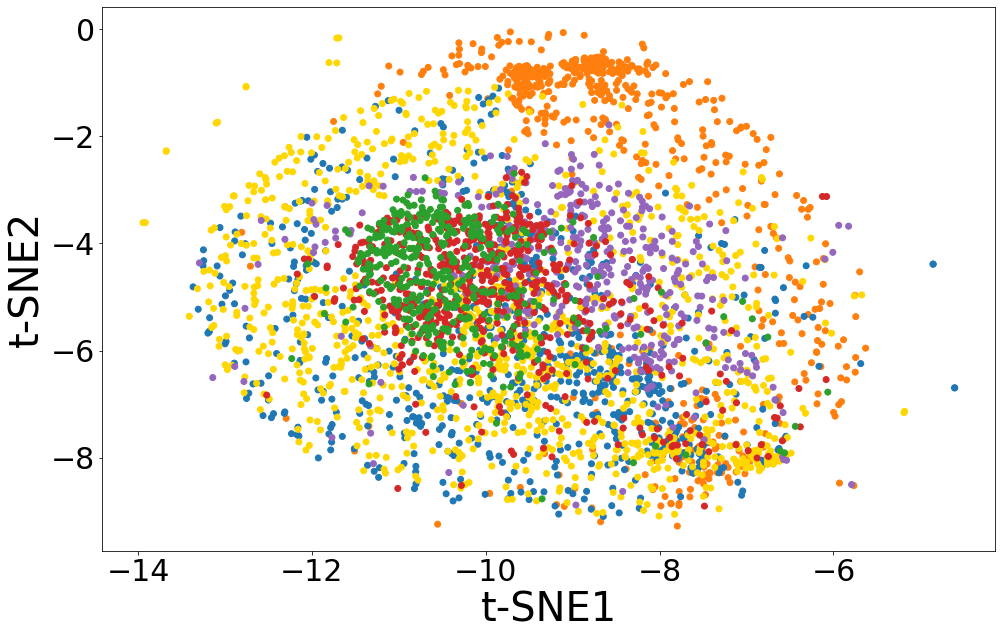

CPU times: user 3min 22s, sys: 1.89 s, total: 3min 24s
Wall time: 11 s


In [29]:
%%time
positions = sklearn.manifold.TSNE(perplexity=30, learning_rate='auto', verbose=1, init='pca').fit_transform(transpose_malignant_expression)
print(positions.shape)

matplotlib.pyplot.scatter(positions[:, 0], positions[:, 1], c=plotting_colors)
matplotlib.pyplot.xlabel('t-SNE1')
matplotlib.pyplot.ylabel('t-SNE2')
matplotlib.pyplot.show()